In [1]:
from O.MM.sc_system import *

''' n_mol_unitcell
hcp : 6
fcc : 4
'''

name = 'A'
PATH = DIR_main+f'MM/molecules/{name}/'

FF_class = LJ
FF_name = FF_class.FF_name

print('FF name:', FF_name)

FF name: LJ


In [2]:
# FF settings (for the LJ potential):
LR_cutoff = 0.8 # nm 
SwitchingFunction_factor = 0.8
T = 60

# MD

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/A/A_fcc_unitcell_cellsmaller.pdb
n_molecules: 180

# initialise_system:
set LJPME cutoff to: 0.8 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.6400000000000001 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  180, n_atoms_mol = 1, N = 180, n_DOF = 537 (n_constraints = 3) 

# initialise_simulation:
set temperature: 60 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to P = 49346 atm, at 60 K, trying every 25 frames.
minimise = True, minimising potential energy (u):
u before minimisation: -3292.4304811960346 kT
u after  minimisation: -3293.3863681462303 kT



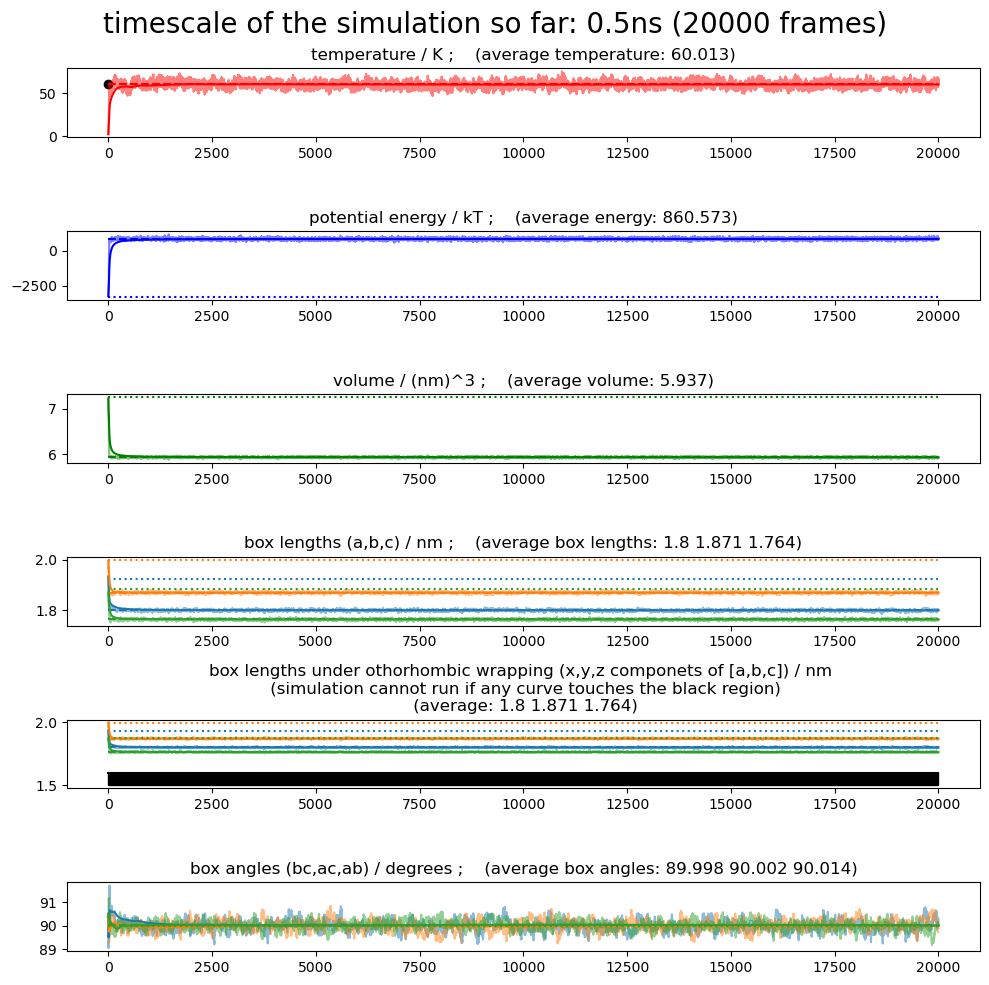

saved ./O/MM/molecules/A//data/NPT/A_LJ_0.8_0.8_NPT_dataset_Form_fcc_Cell_smaller_Temp_60
saved: check_fcc_smaller_LJ_0.8_0.8.gro
CHECK: average lattice potential energy: 4.780958535228145 /kT
u before minimisation: 891.8944344908194 kT
u after  minimisation: 589.3400081485835 kT
saved: ./O/MM/molecules/A//A_LJ_0.8_0.8_equilibrated_Form_fcc_Cell_smaller_Temp_60.pdb
# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/A/A_hcp_unitcell_cellsmaller.pdb
n_molecules: 180

# initialise_system:
set LJPME cutoff to: 0.8 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.6400000000000001 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  180, n_atoms_mol = 1, N = 180, n_DOF = 537 (n_constraints = 3) 

# initialise_simulation:
set temperature: 60 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to 

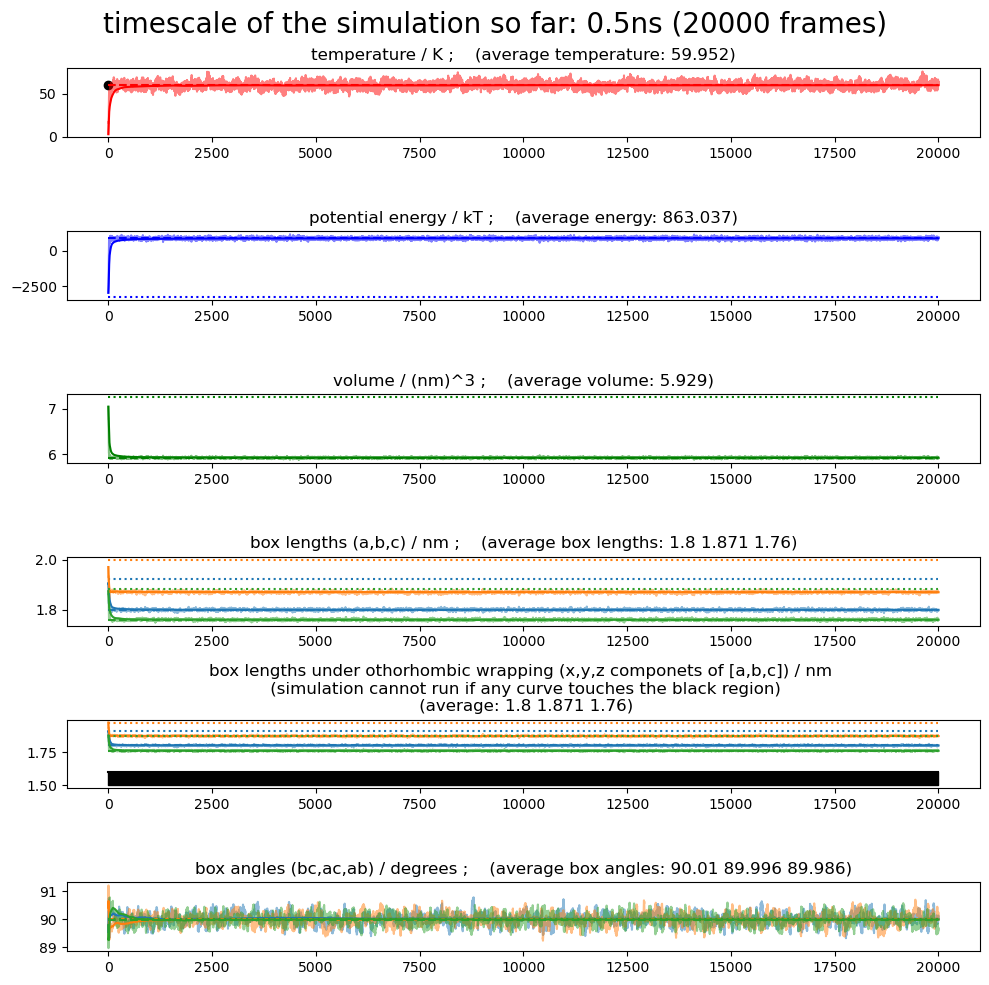

saved ./O/MM/molecules/A//data/NPT/A_LJ_0.8_0.8_NPT_dataset_Form_hcp_Cell_smaller_Temp_60
saved: check_hcp_smaller_LJ_0.8_0.8.gro
CHECK: average lattice potential energy: 4.794648274165578 /kT
u before minimisation: 870.2629354702897 kT
u after  minimisation: 584.0314778157971 kT
saved: ./O/MM/molecules/A//A_LJ_0.8_0.8_equilibrated_Form_hcp_Cell_smaller_Temp_60.pdb


' the above script outputs were:\n\n###############################################################################################\n# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):\n ./O//MM/molecules/argon/argon_bcc_unitcell_cell444.pdb\nn_molecules: 128\n\n# initialise_system:\nset PME cutoff to: 0.7 nm\nremoveCMMotion active: True\nset SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm\nadjusted EwaldErrorTolerance from 0.0005 to 0.0001\nn_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) \n\n# initialise_simulation:\nset temperature: 70 Kelvin\nset integration timestep: 0.0005 ps\nset collision rate (friction ceofficent): 1 /ps\nsetting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 70 K, trying every 25 frames.\nminimise = True, minimising potential energy (u):\nu before minimisation: -601.3754040074383 kT\nu after  minimisation: -601.3754040074383 kT\n\nframe: 20000 T sampled:70.114 T expected:70\n\nsaved ./O/M

In [3]:
# NPT equlibration was done in both forms using this script:

for Form, cell_str in zip(['fcc','hcp'],['smaller', 'smaller']):
    
    sc = SingleComponent(
                    PDB = f'{PATH}/{name}_{Form}_unitcell_cell{cell_str}.pdb',
                    n_atoms_mol = 1,
                    name = name,
                    FF_class = LJ,
                    )
    sc.initialise_system_(PME_cutoff=LR_cutoff, SwitchingFunction_factor = SwitchingFunction_factor, nonbondedMethod=app.LJPME)
    sc.initialise_simulation_(P = 49346, # atm
                              T = T)
    sc.run_simulation_(20000,50)
    sc._xyz = tidy_crystal_xyz_(sc.xyz, sc.boxes, n_atoms_mol=sc.n_atoms_mol, ind_rO=0)
    sc.plot_simulation_info_()
    sc.save_simulation_data_(f'{PATH}/data/NPT/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_NPT_dataset_Form_{Form}_Cell_{cell_str}_Temp_{T}'
                            )
    sc.save_gro_(sc.xyz, b=sc.boxes, name=f'check_{Form}_{cell_str}_LJ_{LR_cutoff}_{SwitchingFunction_factor}')
    print('CHECK: average lattice potential energy:', sc.u.mean()/sc.n_mol,'/kT')

    index = get_index_average_box_automatic_(sc.boxes)
    r = sc.xyz[index] ; b = sc.boxes[index]
    r = sc.minimise_xyz_(r, b=b, verbose=True)
    sc.save_pdb_(r, b=b, name=f'{PATH}/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_equilibrated_Form_{Form}_Cell_{cell_str}_Temp_{T}.pdb')
    del sc


''' the above script outputs were:

###############################################################################################
# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_bcc_unitcell_cell444.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 70 K, trying every 25 frames.
minimise = True, minimising potential energy (u):
u before minimisation: -601.3754040074383 kT
u after  minimisation: -601.3754040074383 kT

frame: 20000 T sampled:70.114 T expected:70

saved ./O/MM/molecules/argon//data/NPT/argon_LJ_0.7_0.8_NPT_dataset_Form_bcc_Cell_444_Temp_70
saved: check_bcc_444_LJ_0.7_0.8.gro
CHECK: average lattice potential energy: -12.450124016880922 /kT
u before minimisation: -1591.7590119421916 kT
u after  minimisation: -1760.2363691628088 kT
saved: ./O/MM/molecules/argon//argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb

###############################################################################################
PLOT (LHS) below
###############################################################################################

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_fcc_unitcell_cell333.pdb
n_molecules: 108

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  108, n_atoms_mol = 1, N = 108, n_DOF = 321 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 70 K, trying every 25 frames.
minimise = True, minimising potential energy (u):
u before minimisation: -1550.3909817129197 kT
u after  minimisation: -1550.3909817129197 kT

frame: 20000 T sampled:69.704 T expected:70

saved ./O/MM/molecules/argon//data/NPT/argon_LJ_0.7_0.8_NPT_dataset_Form_fcc_Cell_333_Temp_70
saved: check_fcc_333_LJ_0.7_0.8.gro
CHECK: average lattice potential energy: -12.433237500827405 /kT
u before minimisation: -1359.5463273496962 kT
u after  minimisation: -1482.5245167472044 kT
saved: ./O/MM/molecules/argon//argon_LJ_0.7_0.8_equilibrated_Form_fcc_Cell_333_Temp_70.pdb

###############################################################################################
PLOT (RHS) below
###############################################################################################
'''

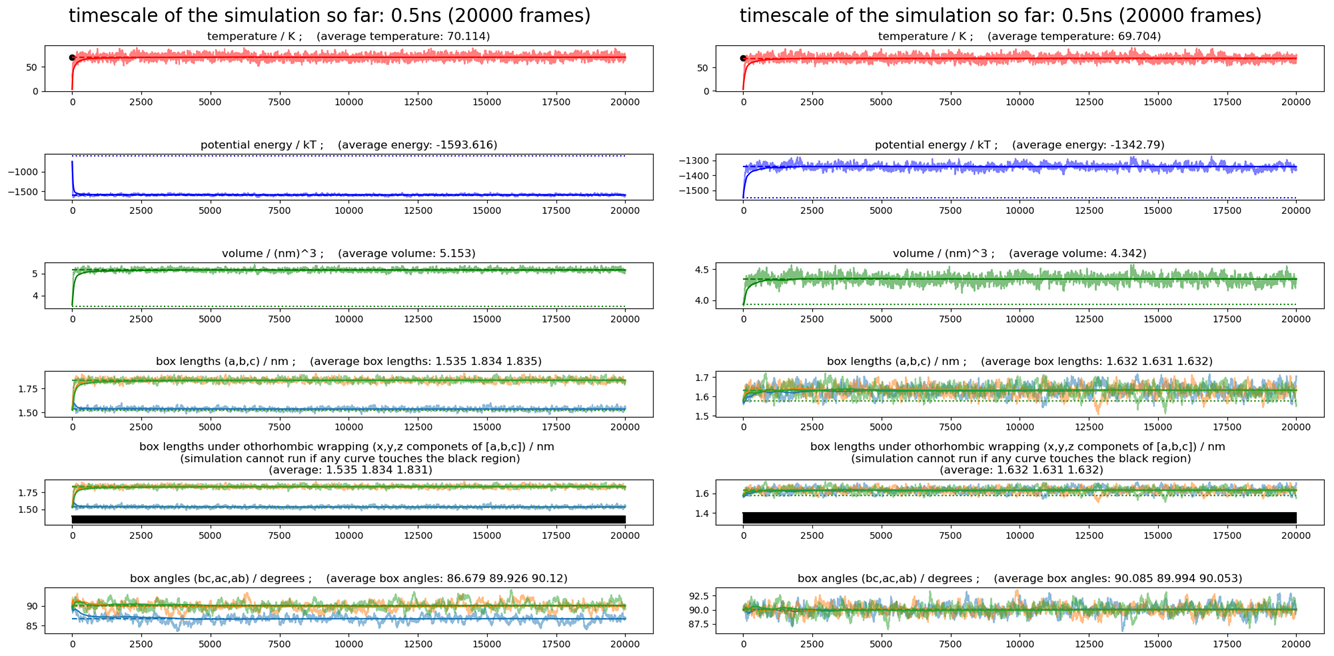

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/A/A_LJ_0.8_0.8_equilibrated_Form_fcc_Cell_smaller_Temp_60.pdb
n_molecules: 180

# initialise_system:
set LJPME cutoff to: 0.8 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.6400000000000001 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  180, n_atoms_mol = 1, N = 180, n_DOF = 537 (n_constraints = 3) 

# initialise_simulation:
set temperature: 60 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: 590.0648568313993 kT
u after  minimisation: 589.1066333332575 kT



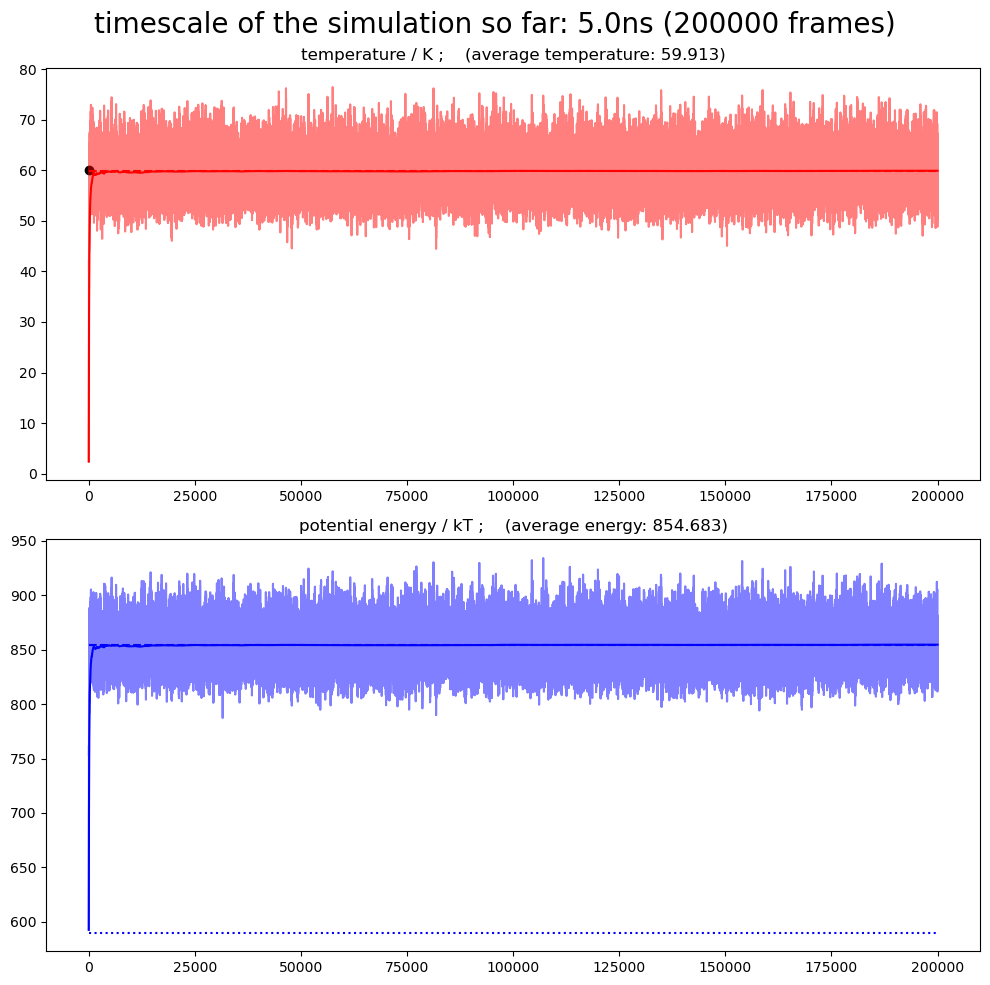

saved ./O/MM/molecules/A//data/A_LJ_0.8_0.8_NVT_dataset_Form_fcc_Cell_smaller_Temp_60
CHECK: average lattice potential energy: 4.748236801591634 /kT
# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/A/A_LJ_0.8_0.8_equilibrated_Form_hcp_Cell_smaller_Temp_60.pdb
n_molecules: 180

# initialise_system:
set LJPME cutoff to: 0.8 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.6400000000000001 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  180, n_atoms_mol = 1, N = 180, n_DOF = 537 (n_constraints = 3) 

# initialise_simulation:
set temperature: 60 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: 584.8909626615618 kT
u after  minimisation: 584.8908137896688 kT



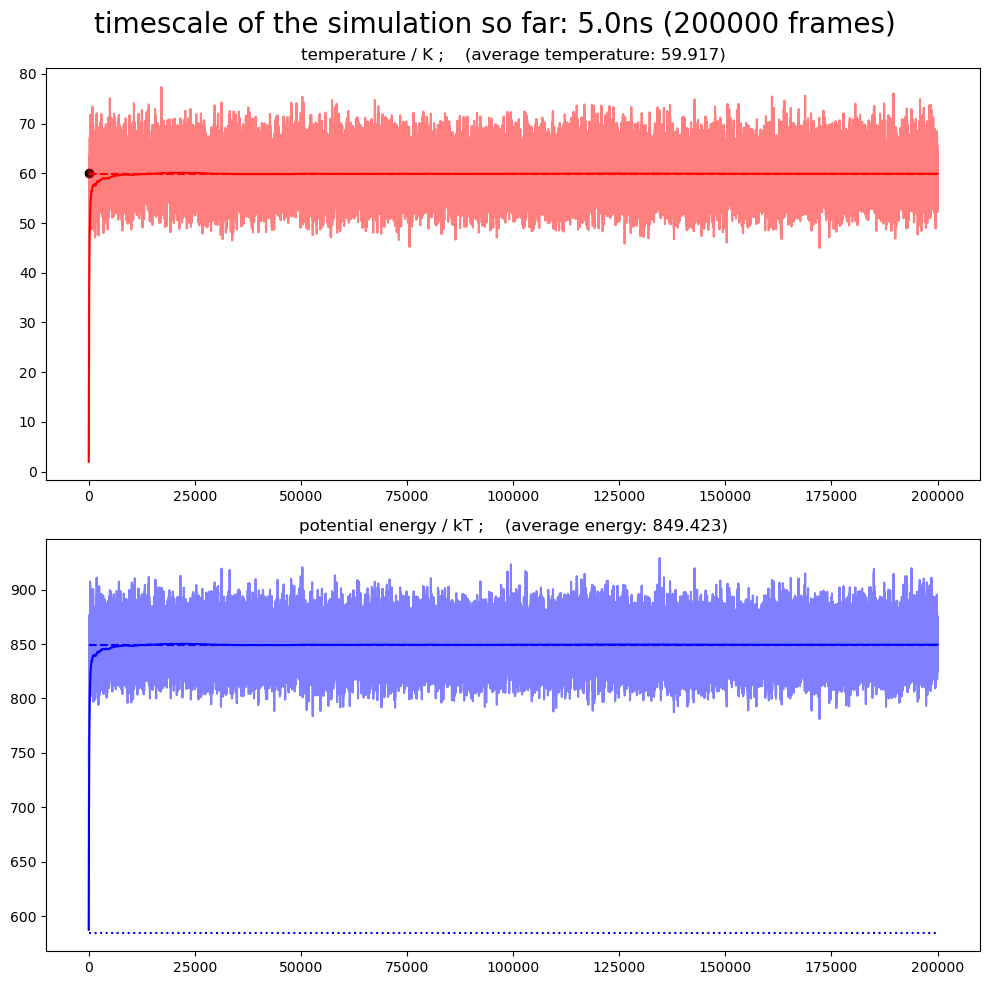

saved ./O/MM/molecules/A//data/A_LJ_0.8_0.8_NVT_dataset_Form_hcp_Cell_smaller_Temp_60
CHECK: average lattice potential energy: 4.719018173341846 /kT


' the above srcipt outputs were:\n\n# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):\n ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb\nn_molecules: 128\n\n# initialise_system:\nset PME cutoff to: 0.7 nm\nremoveCMMotion active: True\nset SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm\nadjusted EwaldErrorTolerance from 0.0005 to 0.0001\nn_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) \n\n# initialise_simulation:\nset temperature: 70 Kelvin\nset integration timestep: 0.0005 ps\nset collision rate (friction ceofficent): 1 /ps\nminimise = True, minimising potential energy (u):\nu before minimisation: -1760.2602030543603 kT\nu after  minimisation: -1760.2602030543603 kT\n\nframe: 200000 T sampled:69.974 T expected:70\n\nsaved ./O/MM/molecules/argon//data/argon_LJ_0.7_0.8_NVT_dataset_Form_bcc_Cell_444_Temp_70\nCHECK: average lattice potential energy: -12.522673453444911 /kT\n\n#############

In [4]:
# NVT simulations for PGM MD data was collected using this script:

for Form, cell_str in zip(['fcc','hcp'],['smaller', 'smaller']):

    PDB = f'{PATH}/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_equilibrated_Form_{Form}_Cell_{cell_str}_Temp_{T}.pdb'
    sc = SingleComponent(PDB = PDB, n_atoms_mol = 1, name = name, FF_class = LJ)
    sc.initialise_system_(PME_cutoff=LR_cutoff, SwitchingFunction_factor = SwitchingFunction_factor, nonbondedMethod=app.LJPME)
    sc.initialise_simulation_(P = None,
                              T = T)
    sc.run_simulation_(200000,50)
    sc.plot_simulation_info_()
    sc.save_simulation_data_(f'{PATH}/data/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_NVT_dataset_Form_{Form}_Cell_{cell_str}_Temp_{T}'
                            )
    print('CHECK: average lattice potential energy:', sc.u.mean()/sc.n_mol,'/kT')
    del sc

''' the above srcipt outputs were:

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1760.2602030543603 kT
u after  minimisation: -1760.2602030543603 kT

frame: 200000 T sampled:69.974 T expected:70

saved ./O/MM/molecules/argon//data/argon_LJ_0.7_0.8_NVT_dataset_Form_bcc_Cell_444_Temp_70
CHECK: average lattice potential energy: -12.522673453444911 /kT

###############################################################################################
PLOT (LHS) below
###############################################################################################

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_fcc_Cell_333_Temp_70.pdb
n_molecules: 108

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  108, n_atoms_mol = 1, N = 108, n_DOF = 321 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1482.4973694028226 kT
u after  minimisation: -1482.4973694028226 kT

frame: 200000 T sampled:70.079 T expected:70

saved ./O/MM/molecules/argon//data/argon_LJ_0.7_0.8_NVT_dataset_Form_fcc_Cell_333_Temp_70
CHECK: average lattice potential energy: -12.479304856735366 /kT

###############################################################################################
PLOT (RHS) below
###############################################################################################
'''

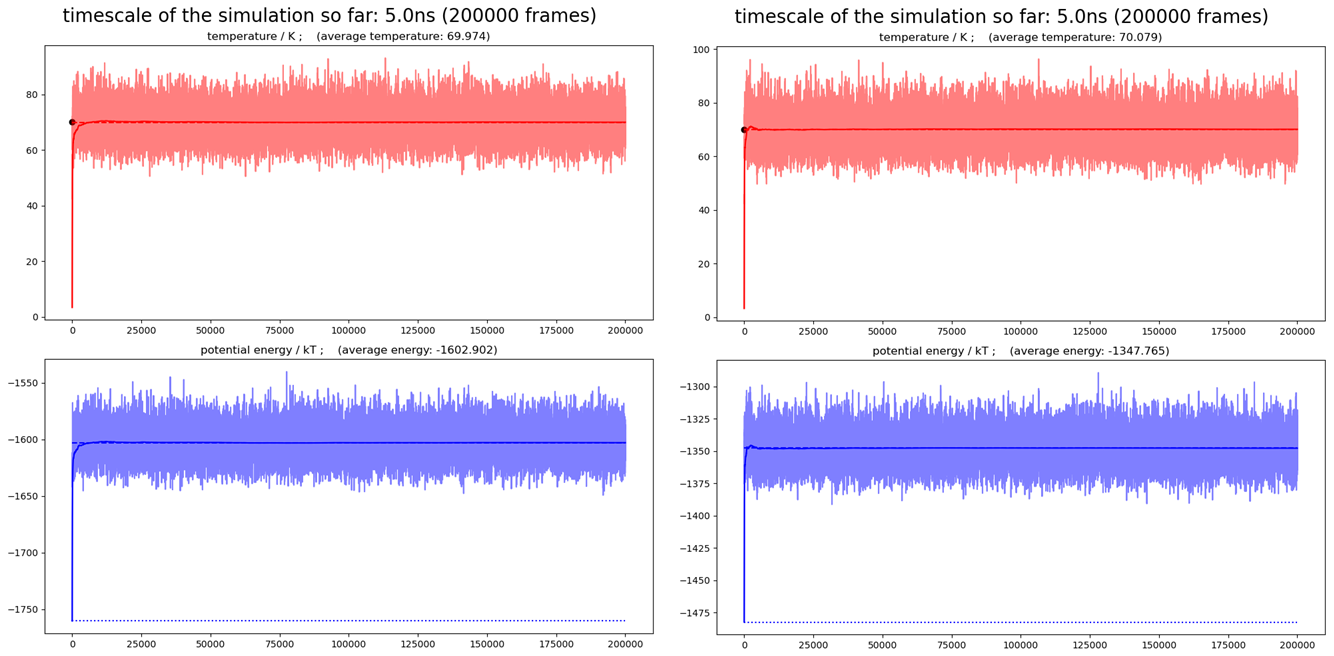

# without the (above) data, loading one of the instances of nn (below)

In [8]:
from O.NN.pgm_LJ import *
import pickle
Form, cell_str, T = 'fcc', '333', 70
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.
key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[0],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ,
                                 training=False)
nn.load_misc_()
nn.solve_BAR_using_pymbar_()
nn.load_model_()
nn.plot_result_(n_mol = nn.model.n_mol) 
print('lattice FE:', nn.nns[0].BAR_V_FE/nn.model.n_mol, '+/-',nn.nns[0].BAR_V_SE/nn.model.n_mol,'kT')

# NB: nn.model.n_mol should not be a variable for a permutationally invariant model
# NB: u_mean is missing from the nn instance here (was not saved at any point; might add that to be saved inside ic_map)

found saved BAR result
./O/NN/training_results/fitted_models/argon_LJ_0.7_0.8_Form_fcc_Cell_333_Temp_70_1layers_fixedatom_False_SC__model_


EOFError: Ran out of input

# training

In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices())
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

2025-07-29 17:15:32.806832: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-29 17:15:32.820692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753830932.835568  421470 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753830932.839488  421470 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753830932.852099  421470 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from O.NN.pgm_LJ import *

2025-07-29 18:28:48.260360: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-29 18:28:48.273902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753835328.288756  427224 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753835328.292547  427224 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753835328.304350  427224 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# training: Form 'fcc', cell 'smaller', NVT(N=180, V=equilibrated, T=60K)

In [4]:
Form, cell_str, T = 'fcc', 'smaller', 60
dataset_path = f'{PATH}/data/{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_NVT_dataset_Form_{Form}_Cell_{cell_str}_Temp_{T}'

In [5]:
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.

key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[dataset_path],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ)

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/A/A_LJ_0.8_0.8_equilibrated_Form_fcc_Cell_smaller_Temp_60.pdb
n_molecules: 180

# initialise_system:
set LJPME cutoff to: 0.8 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.6400000000000001 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  180, n_atoms_mol = 1, N = 180, n_DOF = 537 (n_constraints = 3) 

# initialise_simulation:
set temperature: 60 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: 590.0648568313993 kT
u after  minimisation: 589.1066333332575 kT



In [6]:
nn.set_ic_map_step1()
nn.set_ic_map_step2()
nn.set_ic_map_step3()

molecule with 1 atoms, of which 1 are heavy atoms, and the rest are 0 hydrogens.
set_ABCD_ : nothing was defined
COM removed from data, without taking into account PBC of the box
inds_rand attempt: 1
found !
checking that PES matches the sampled dataset:
errT: -3.2622778246604868e-06 -0.0012625435747395386 0.0012453384763375652
errV: -1.3603497797475939e-05 -0.0012591981388823115 0.0011308170401207462
initialising on 200000 datapoints provided
SCmap.initalise_ : a single box provided -> Cartesian transformed by SCmap.
ic_map inversion errors on a small random batch:
positons: 1.41859055e-05
volume: 0.00024414062
!! 1.0001105


In [7]:
# the n_mol (= N atoms), here is fairly high, which turns out to be quite expensive (for attention-based the coupling of molecules)

evaluation_batch_size = 500 # usually 5000 or 10000, but here can use a cheaper smaller number (1000)
learning_rate = 0.001 # the fast learning rate.

nn.set_model(n_layers=n_layers, evaluation_batch_size=evaluation_batch_size, learning_rate=learning_rate)

There are 6278892 trainable parameters in this model, among 18 trainable weights.
[To see dimensionalities of the trainable weights print(list(self.shapes_trainable_weights)).] 
inv_test_res0 ([[np.float32(1.8592788e-06), np.float32(1.424551e-05)], [np.float32(1.953125e-06), np.float32(-0.00024414062), np.float32(0.00024414062)]], [[[np.float32(0.00022894019), np.float32(0.0021149963)]], [np.float32(0.00030249023), np.float32(-0.057128906), np.float32(0.068603516)]])


In [8]:
nn.set_trainer()

'41.66 2999 2999 59 AVMD_T:[16.3651863] AVMD_V:[np.float64(16.36576821637542)] || FE:[np.float64(16.387823152984275)] SD:[np.float64(0.0007817661530400386)]'

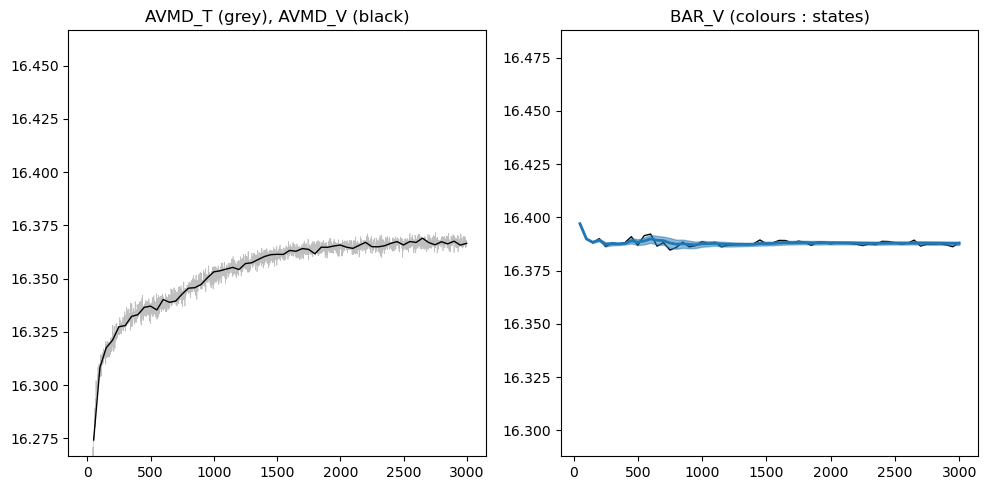

training time so far: 41.71 minutes
saved ./O//NN/training_results/misc/A_LJ_0.8_0.8_Form_fcc_Cell_smaller_Temp_60_1layers_fixedatom_False_SC__misc_
misc training outputs were saved


In [9]:
training_batch_size = 100 # this is small also (faster), usually using 1000
n_batches = 3000 # enough here

nn.train(training_batch_size=training_batch_size, n_batches=n_batches, f_halfwindow_visualisation=0.1)

In [10]:
nn.load_misc_()
nn.load_energies_during_training_()

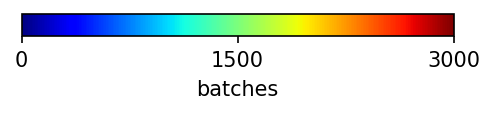

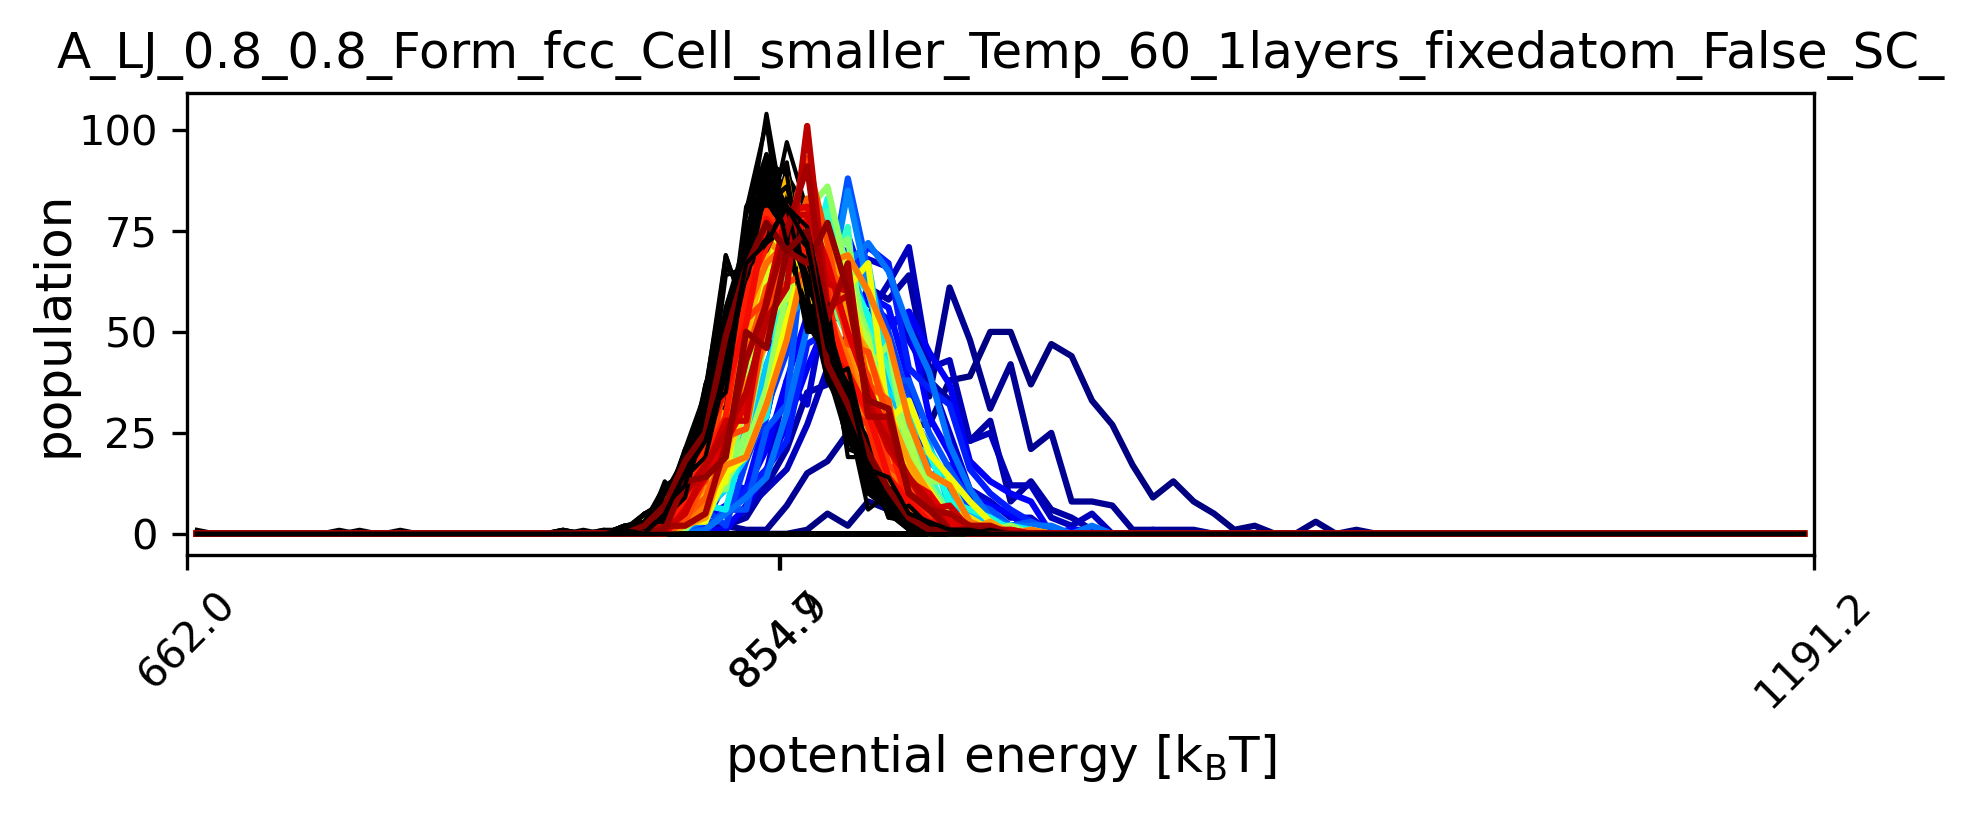

In [11]:
nn.plot_energies_during_training_()
# small overlap, but somehow this is enough for normal reweighting in this system

In [12]:
nn.solve_BAR_using_pymbar_(rerun=True)

59
BAR: T estimate59skipped
saved ./O//NN/training_results/BAR/A_LJ_0.8_0.8_Form_fcc_Cell_smaller_Temp_60_1layers_fixedatom_False_SC__BAR__BAR_output_crystal_index=0
saved BAR result


n_mol= 180
16.38783631983915 +/- 0.0007707032852694615 final: 16.38783631983919 +/- 0.0007707032852884132
lattice FE: 16.38783631983919 +/- 0.0007707032852884132 kT


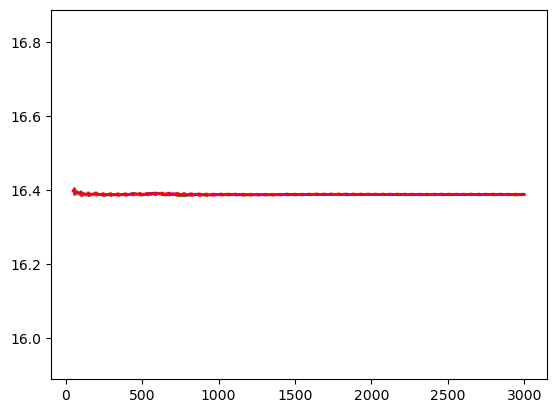

In [13]:
n_mol = nn.nns[0].sc.n_mol

print('n_mol=', n_mol)
nn.plot_result_(n_mol=n_mol, window=0.5)

print('lattice FE:', nn.nns[0].BAR_V_FE/n_mol, '+/-',nn.nns[0].BAR_V_SE/n_mol,'kT')

In [14]:
print('lattice average potential energy:', nn.nns[0].u_mean / n_mol)

lattice average potential energy: 4.748236801591634


In [15]:
r_MD = np.array(nn.nns[0].r_validation)
print(r_MD.shape)
r_BG = nn.sample_model_(r_MD.shape[0])
print(r_BG.shape)

(40000, 180, 3)
(40000, 180, 3)


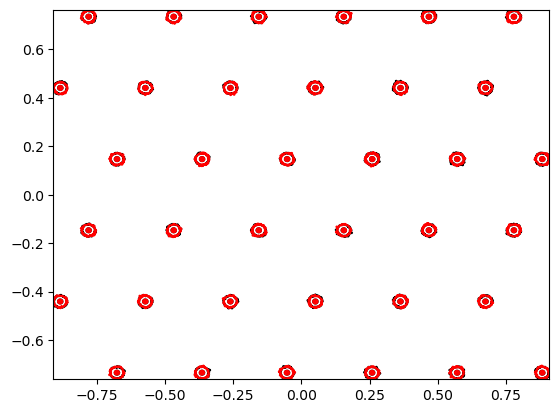

In [16]:
#plt.scatter(r_MD[...,1], r_MD[...,2],s=1)
#plt.scatter(r_BG[...,1], r_BG[...,2],s=1)

plot_2D_histogram_(r_MD[...,1], r_MD[...,2], colors='black', bins=1000, levels=2)
plot_2D_histogram_(r_BG[...,1], r_BG[...,2], colors='red',   bins=1000, levels=2)

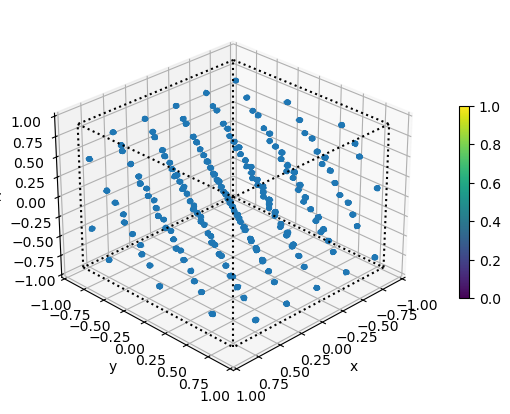

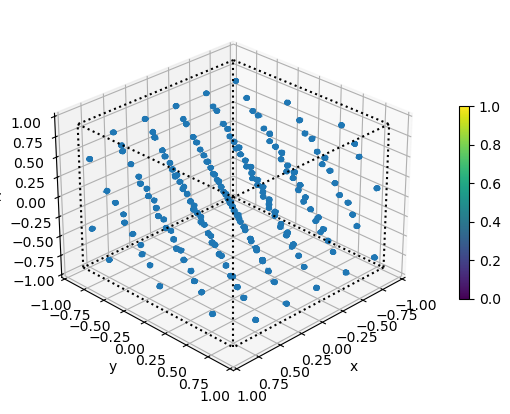

In [17]:
plot_points_3D_(r_MD[:1000].reshape([r_MD[:1000].shape[0]*r_MD.shape[1],3]), s=1, view_elev_azim=[0,1])
plot_points_3D_(r_BG[:1000].reshape([r_BG[:1000].shape[0]*r_BG.shape[1],3]), s=1, view_elev_azim=[0,1])

In [18]:
nn.save_model_() # not saving samples

AttributeError: Can't pickle local object 'Layer._initialize_tracker.<locals>.<lambda>'

In [ ]:
# check that model loads:

In [19]:
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.

key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[dataset_path],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ)

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/A/A_LJ_0.8_0.8_equilibrated_Form_fcc_Cell_smaller_Temp_60.pdb
n_molecules: 180

# initialise_system:
set LJPME cutoff to: 0.8 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.6400000000000001 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  180, n_atoms_mol = 1, N = 180, n_DOF = 537 (n_constraints = 3) 

# initialise_simulation:
set temperature: 60 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: 590.0648568313993 kT
u after  minimisation: 589.1066333332575 kT



In [20]:
nn.load_model_()

./O//NN/training_results/fitted_models/A_LJ_0.8_0.8_Form_fcc_Cell_smaller_Temp_60_1layers_fixedatom_False_SC__model_


EOFError: Ran out of input

In [45]:
nn.evaluation_batch_size = 1000
r_BG = nn.sample_model_(40000)
print(r_BG.shape)

(40000, 108, 3)


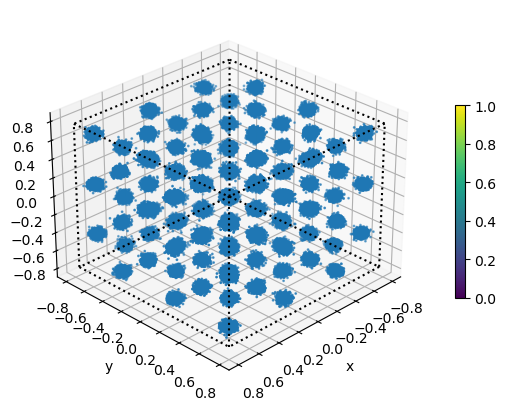

In [46]:
plot_points_3D_(r_BG[:1000].reshape([r_BG[:1000].shape[0]*r_BG.shape[1],3]), s=1, view_elev_azim=[0,1])
# model loads, can be sampled again.

# training: Form 'hcp', cell 'smaller', NVT(N=180, V=equilibrated, T=60K)

In [4]:
Form, cell_str, T = 'hcp', 'smaller', 60
dataset_path = f'{PATH}/data/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_NVT_dataset_Form_{Form}_Cell_{cell_str}_Temp_{T}'

In [5]:
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.

key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[dataset_path],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ)

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/A/A_LJ_0.8_0.8_equilibrated_Form_hcp_Cell_smaller_Temp_60.pdb
n_molecules: 180

# initialise_system:
set LJPME cutoff to: 0.8 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.6400000000000001 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  180, n_atoms_mol = 1, N = 180, n_DOF = 537 (n_constraints = 3) 

# initialise_simulation:
set temperature: 60 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: 584.8909626615618 kT
u after  minimisation: 584.8908137896688 kT



In [7]:
nn.set_ic_map_step1()
nn.set_ic_map_step2()
nn.set_ic_map_step3()
evaluation_batch_size = 500
learning_rate = 0.001
nn.set_model(n_layers=n_layers, evaluation_batch_size=evaluation_batch_size, learning_rate=learning_rate)

# NB: the model has the same number of parameters but the number of molecules is higher.

molecule with 1 atoms, of which 1 are heavy atoms, and the rest are 0 hydrogens.
set_ABCD_ : nothing was defined
COM removed from data, without taking into account PBC of the box
inds_rand, imported earlier, were used
checking that PES matches the sampled dataset:
errT: -0.00011029256639312734 -0.0014048440760916492 0.0010466434857789864
errV: -0.00011321480456467726 -0.0013701949195592533 0.0014550256130405614
initialising on 200000 datapoints provided
SCmap.initalise_ : a single box provided -> Cartesian transformed by SCmap.
ic_map inversion errors on a small random batch:
positons: 1.3411045e-05
volume: 0.00024414062
!! 1.0000858
There are 6278892 trainable parameters in this model, among 18 trainable weights.
[To see dimensionalities of the trainable weights print(list(self.shapes_trainable_weights)).] 
inv_test_res0 ([[np.float32(1.8335076e-06), np.float32(1.347065e-05)], [np.float32(-3.1738282e-06), np.float32(-0.00024414062), np.float32(0.00024414062)]], [[[np.float32(0.0002340

In [8]:
nn.set_trainer()

'38.36 2999 2999 59 AVMD_T:[16.35342985] AVMD_V:[np.float64(16.352257869014515)] || FE:[np.float64(16.375376536848513)] SD:[np.float64(0.0006656905267535422)]'

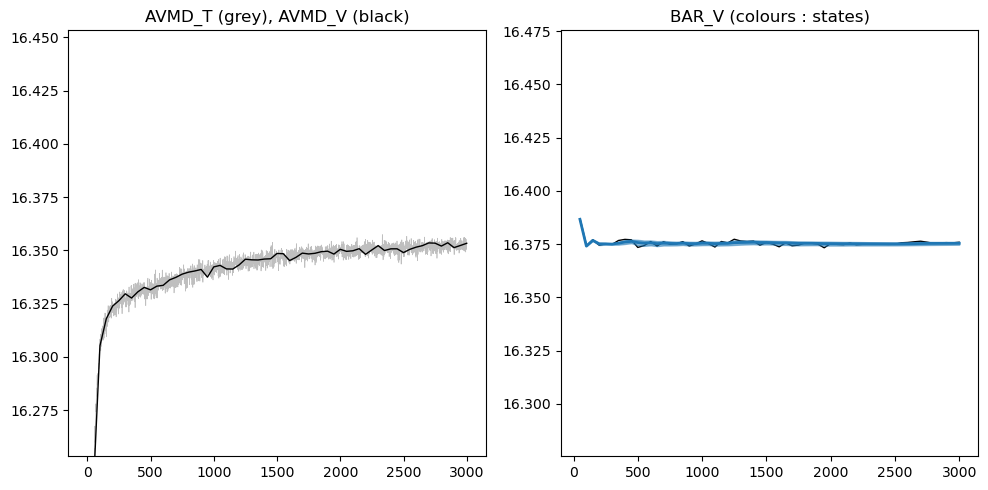

training time so far: 38.41 minutes
saved ./O//NN/training_results/misc/A_LJ_0.8_0.8_Form_hcp_Cell_smaller_Temp_60_1layers_fixedatom_False_SC__misc_
misc training outputs were saved


In [9]:
training_batch_size = 100 # this is small also (faster), usually using 1000
n_batches = 3000 # enough here

nn.train(training_batch_size=training_batch_size, n_batches=n_batches, f_halfwindow_visualisation=0.1)

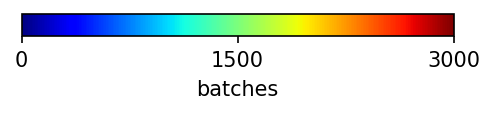

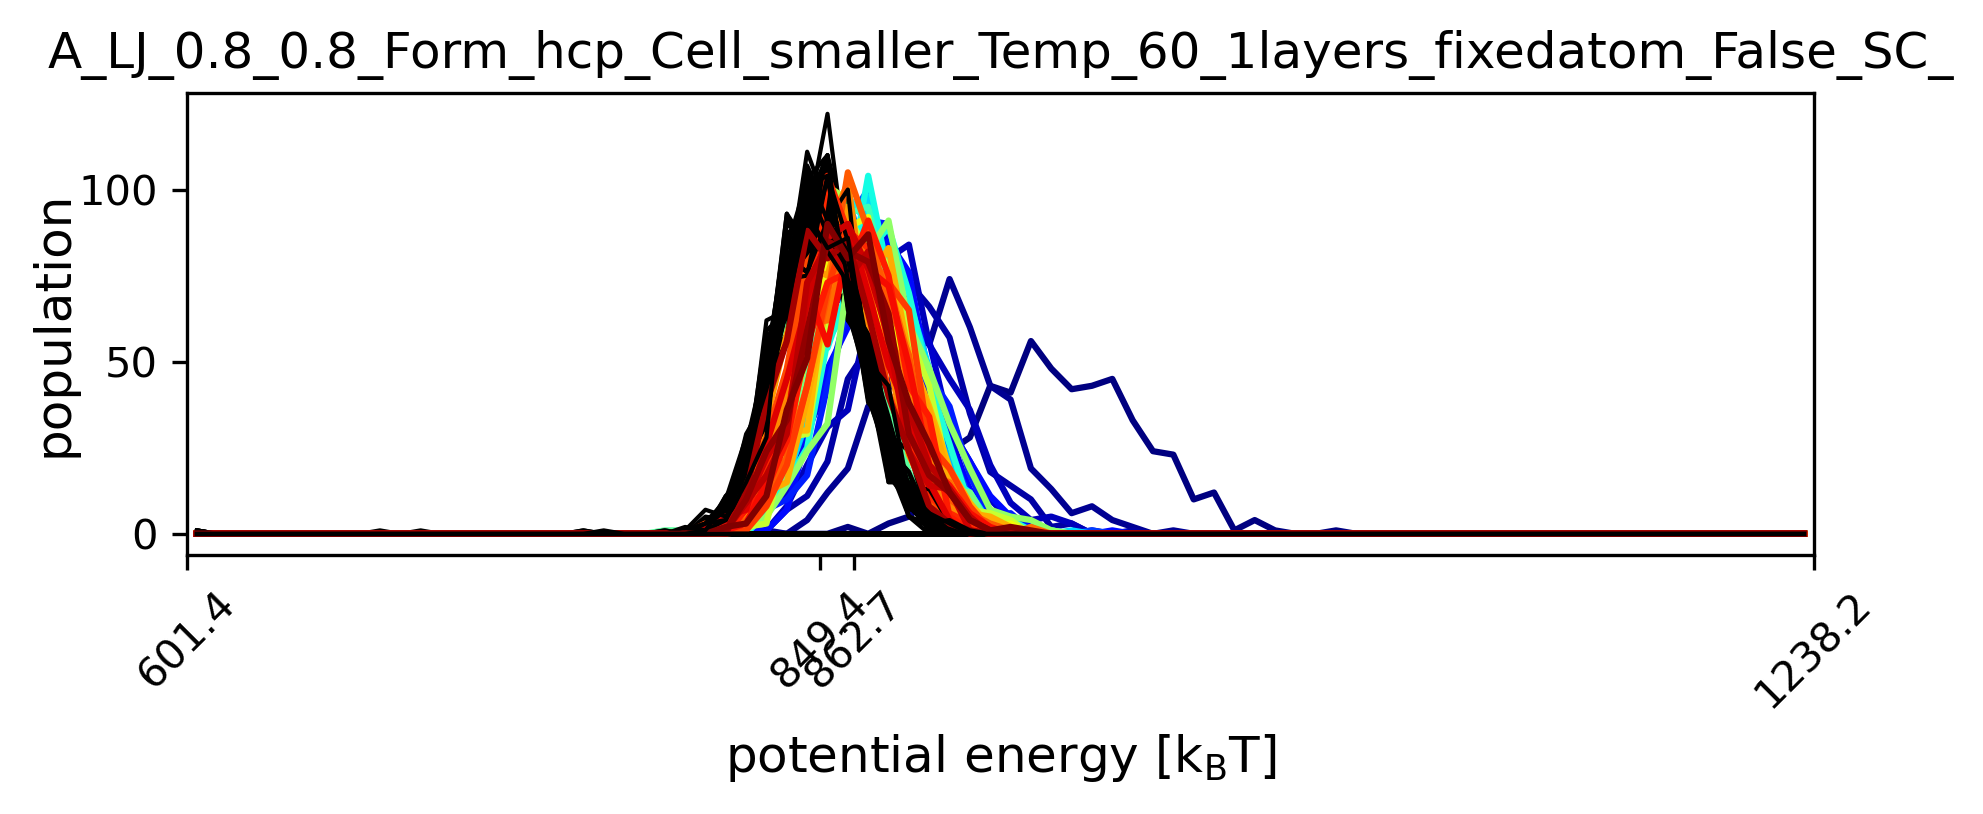

In [10]:
nn.load_misc_()
nn.load_energies_during_training_()
nn.plot_energies_during_training_()

In [11]:
nn.solve_BAR_using_pymbar_(rerun=True)

59
BAR: T estimate59skipped
saved ./O//NN/training_results/BAR/A_LJ_0.8_0.8_Form_hcp_Cell_smaller_Temp_60_1layers_fixedatom_False_SC__BAR__BAR_output_crystal_index=0
saved BAR result


n_mol= 180
16.375400598128945 +/- 0.0006587564474817793 final: 16.37540059811778 +/- 0.0007110715764746801
lattice FE: 16.37540059811778 +/- 0.0007110715764746801 kT


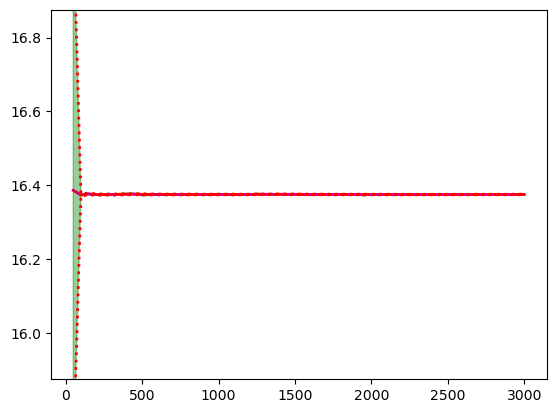

In [12]:
n_mol = nn.nns[0].sc.n_mol
print('n_mol=', n_mol)
nn.plot_result_(n_mol=n_mol, window=0.5)
print('lattice FE:', nn.nns[0].BAR_V_FE/n_mol, '+/-',nn.nns[0].BAR_V_SE/n_mol,'kT')

In [13]:
print('lattice average potential energy:', nn.nns[0].u_mean / n_mol)

lattice average potential energy: 4.719018173341846


In [14]:
r_MD = np.array(nn.nns[0].r_validation)
print(r_MD.shape)
r_BG = nn.sample_model_(r_MD.shape[0])
print(r_BG.shape)

(40000, 180, 3)
(40000, 180, 3)


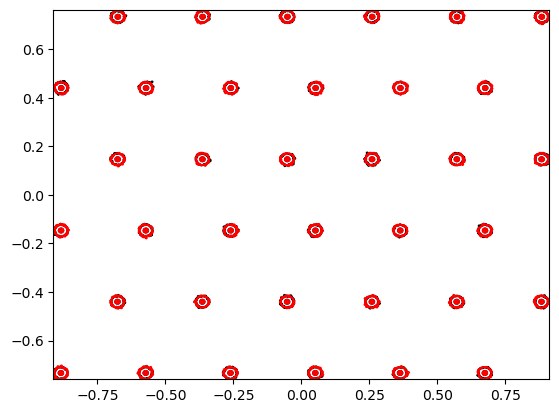

In [15]:
plot_2D_histogram_(r_MD[...,1], r_MD[...,2], colors='black', bins=1000, levels=2)
plot_2D_histogram_(r_BG[...,1], r_BG[...,2], colors='red',   bins=1000, levels=2)

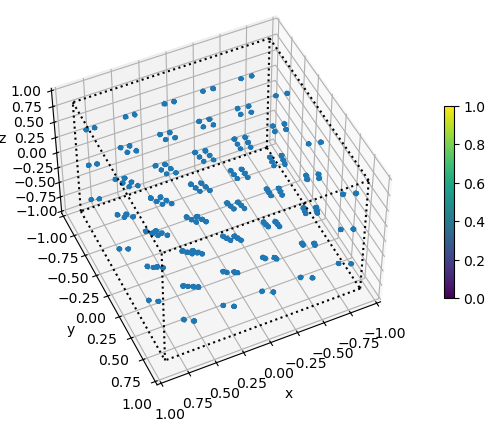

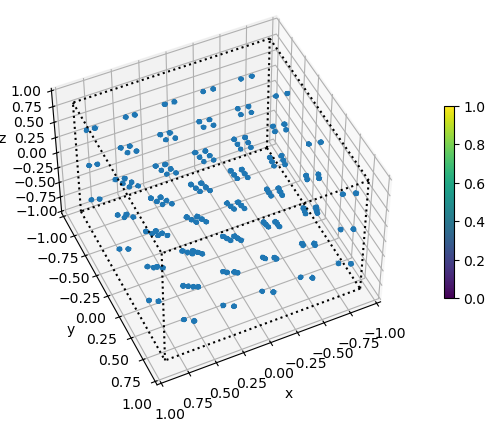

In [16]:
plot_points_3D_(r_MD[:1000].reshape([r_MD[:1000].shape[0]*r_MD.shape[1],3]), s=0.1)
plot_points_3D_(r_BG[:1000].reshape([r_BG[:1000].shape[0]*r_BG.shape[1],3]), s=0.1)

In [86]:
nn.save_model_() # not saving samples

saved ./O//NN/training_results/fitted_models/argon_LJ_0.7_0.8_Form_bcc_Cell_444_Temp_70_1layers_fixedatom_False_SC__model_


In [88]:
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.

key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[dataset_path],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ)

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1760.2602030543603 kT
u after  minimisation: -1760.2602030543603 kT



In [89]:
nn.load_model_()
nn.evaluation_batch_size = 1000
r_BG = nn.sample_model_(40000)
print(r_BG.shape)

(40000, 128, 3)


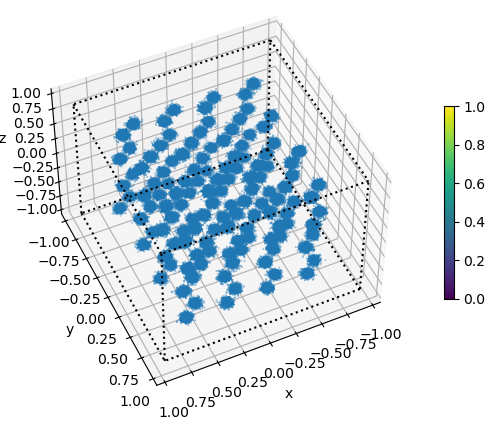

In [90]:
plot_points_3D_(r_BG[:1000].reshape([r_BG[:1000].shape[0]*r_BG.shape[1],3]), s=0.1)
# model loads, can be sampled again.

# results

In [ ]:
##  'fcc', '333', 70
# lattice average potential energy: -12.479304856735366
# lattice FE: -4.8440452794790305 +/- 0.019041520054226792 kT

## 'bcc', '444', 70
# lattice average potential energy: -12.522673453444911
# lattice FE: -4.844112576720076 +/- 0.018753177874183617 kT

In [97]:
u_fcc = -12.479304856735366
f_fcc = -4.8440452794790305
se_fcc = 0.019041520054226792

u_bcc = -12.522673453444911
f_bcc = -4.844112576720076
se_bcc = 0.018753177874183617

u_Forms = np.array([u_fcc, u_bcc])
f_Forms = np.array([f_fcc, f_bcc])
se_Forms = np.array([se_fcc, se_bcc])


[6.7297241e-05 0.0000000e+00] [0.0377947  0.03750636]


Text(0.5, 1.0, 'differences between: black:average potential energy, blue:fe')

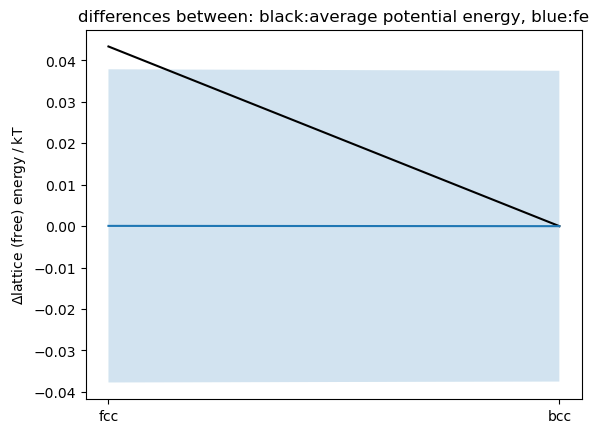

In [116]:
plt.plot(u_Forms - u_Forms.min(), color='black')
ind_min = 1

delta_f = f_Forms - f_Forms[ind_min]
se_delta_f = se_Forms + se_Forms[ind_min]

print(delta_f, se_delta_f)

plt.plot(delta_f)
plt.fill_between([0,1], delta_f-se_delta_f, delta_f+se_delta_f, alpha=0.2)

plt.xticks([0,1], ['fcc','bcc'])
plt.ylabel(r'$\Delta \text{lattice (free) energy} \; / \; \text{kT}$')
plt.title('differences between: black:average potential energy, blue:fe')

# both forms ranked the same with this FF (at settings: {LR_cutoff}_{SwitchingFunction_factor})

# previous attempts, problems, interpretation and further work

two other models were tried (fixed_atom = True with different settings, and a naive model without any weight-sharing). Not discussing the associated results here, but can show. They both had problems that prevented accurate FEs, for two opposite reasons; underfitting, and insufficient ergodicity of MD data (at this low T), respectively. The suboptimal ergodicity is related in this case of permutations of the particles across the supercell. Making the model pay less attention to permutations, resolved the issue, but the energy overlap became worse. The current model that worked (this JN) is trying to balance between the two extremes without sampling more data or coming up with anything new.

The former model is clearly preferred for further work (invariant to …), because it would require minimum training data, and generalise to systems of different size. The ic_map used here (with fixed atom True) may be sufficient for such hypothetical model for single component monatomic systems, but the exact coupling connectivity inside the trainable part of the model can do with (needs) further work. Prior to thinking about that, might add a CNF-based approach here later (in a few months); to compare with splines (+ maybe 'unfocused' splines are not accurate enough as they were currently tested with fixed_atom = True). 

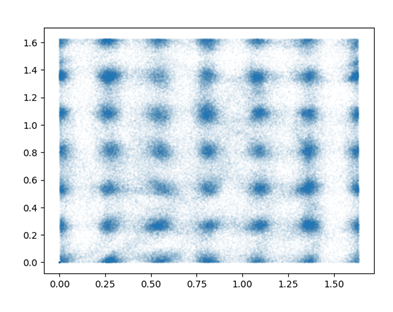